<a href="https://colab.research.google.com/github/Tonyblair2002/RAIN-PREDICTION-/blob/main/Copy_of_winequality_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

  

KeyboardInterrupt: ignored

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
data = pd.read_csv('winequality.csv')
df = data.copy()
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# Displaying description of data-set

percent = [0.04, 0.25, 0.5, 0.75, 0.96]
display(data.describe(percentiles=percent))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
4%,6.000000,0.260000,0.000000,1.500000,0.052000,4.000000,11.000000,0.993460,3.049200,0.460000,9.200000,5.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
96%,12.000000,0.870000,0.640000,5.600000,0.153320,37.000000,119.080000,1.000122,3.580000,0.970800,12.608000,7.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
# From sklear we are importing 'preprocessing'
# Further MinMaxScaler() will be used for scaling data between [0,1]

from sklearn import preprocessing

# Setting all the column names in a variable 'features'
features = data.keys()

min_max_scaler = preprocessing.MinMaxScaler()
data_array_scaled = min_max_scaler.fit_transform(data)

# Creating an empty data frame
data_scaled = pd.DataFrame()

for x in range(0,12):
    dataset = pd.DataFrame({features[x]:data_array_scaled[:,x]})
    data_scaled = pd.concat([data_scaled, dataset], axis=1, join_axes=[dataset.index])
    
display(data_scaled.head())

TypeError: ignored

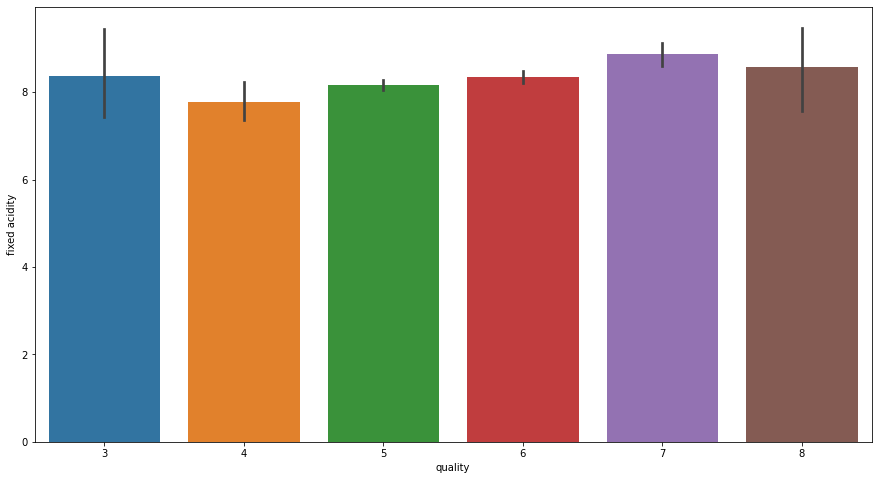

In [ ]:
# Creating a empty figure then creating bar-graph using Seaborn
fig = plt.figure(figsize = (15,8))
sns.barplot(x = 'quality', y = 'fixed acidity', data = data)

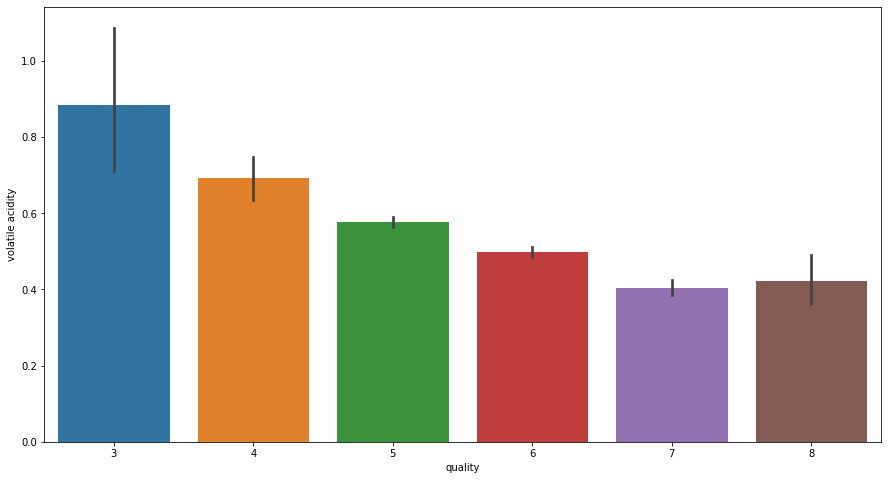

In [ ]:
fig = plt.figure(figsize = (15,8))
sns.barplot(x = 'quality', y = 'volatile acidity', data = data)

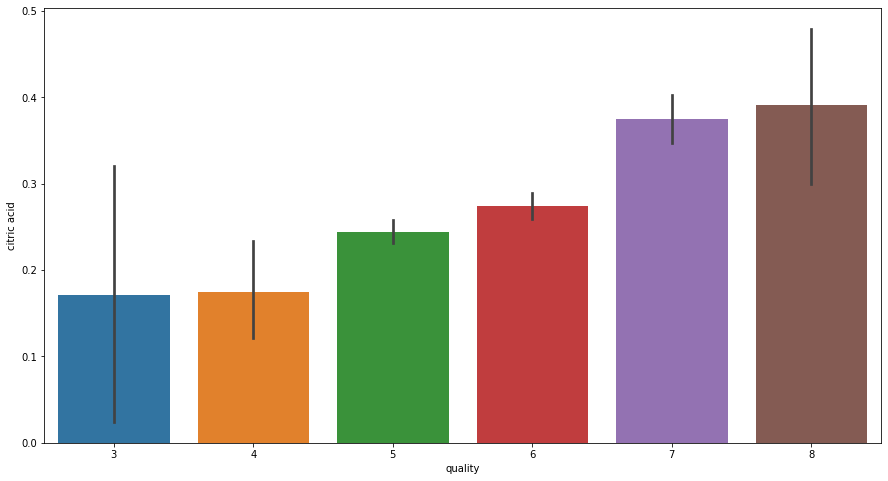

In [ ]:
fig = plt.figure(figsize = (15,8))
sns.barplot(x = 'quality', y = 'citric acid', data = data)

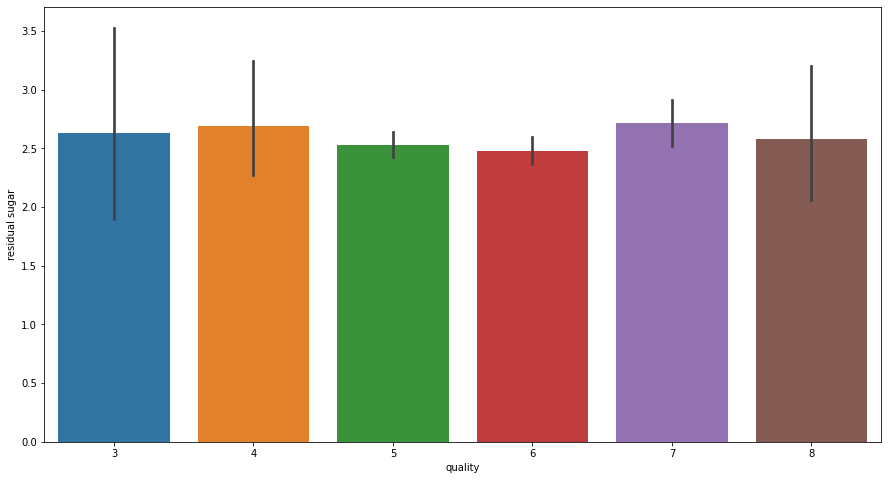

In [ ]:
fig = plt.figure(figsize = (15,8))
sns.barplot(x = 'quality', y = 'residual sugar', data = data)

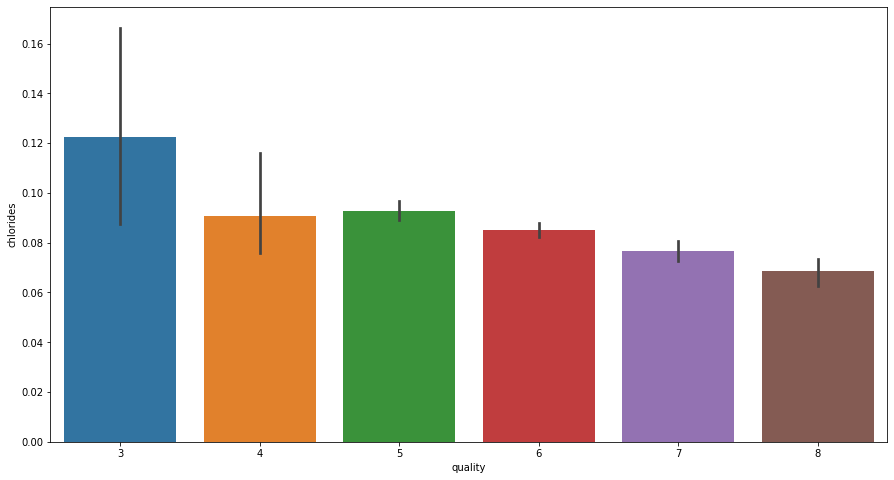

In [ ]:
fig = plt.figure(figsize = (15,8))
sns.barplot(x = 'quality', y = 'chlorides', data = data)

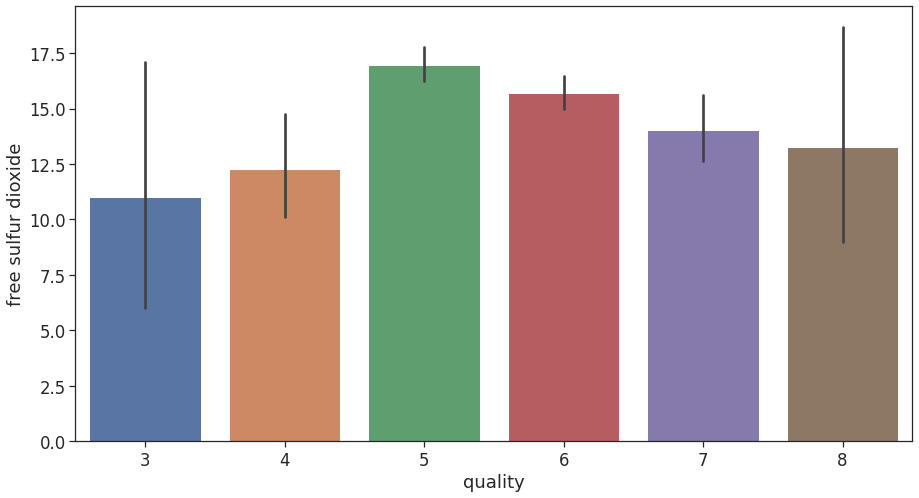

In [ ]:
fig = plt.figure(figsize = (15,8))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = data)

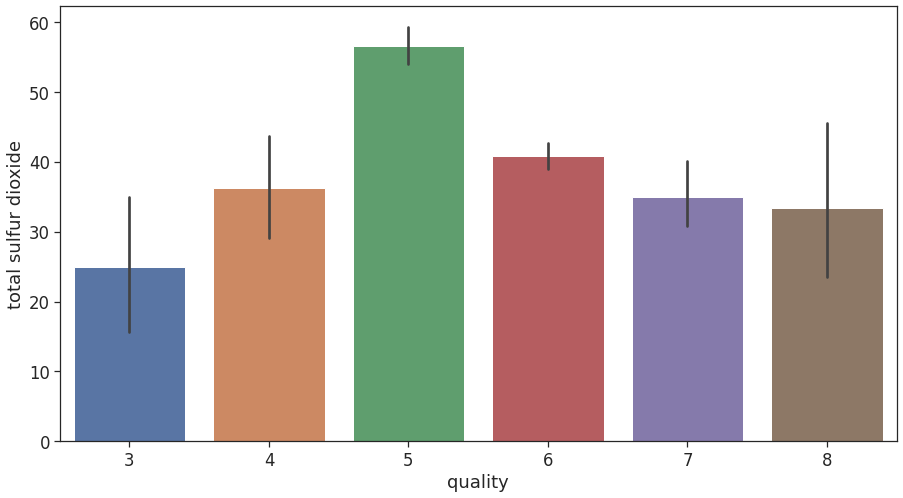

In [ ]:
fig = plt.figure(figsize = (15,8))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = data)

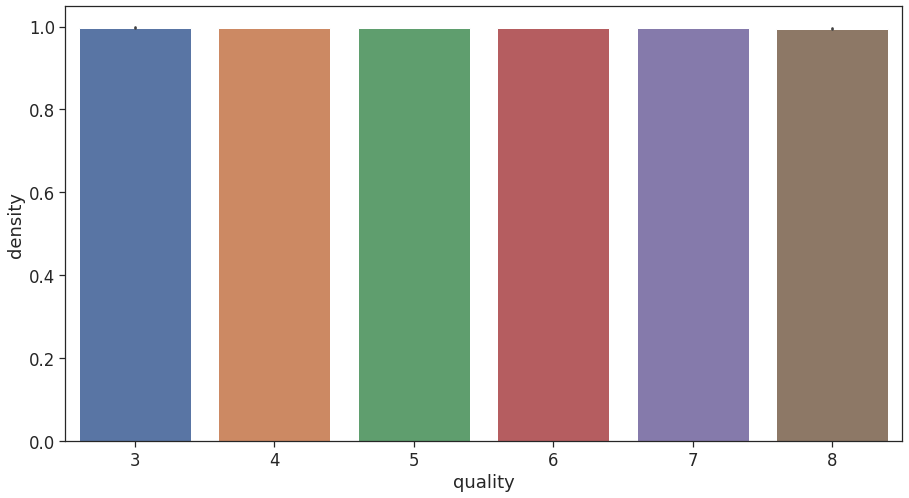

In [ ]:
fig = plt.figure(figsize = (15,8))
sns.barplot(x = 'quality', y = 'density', data = data)

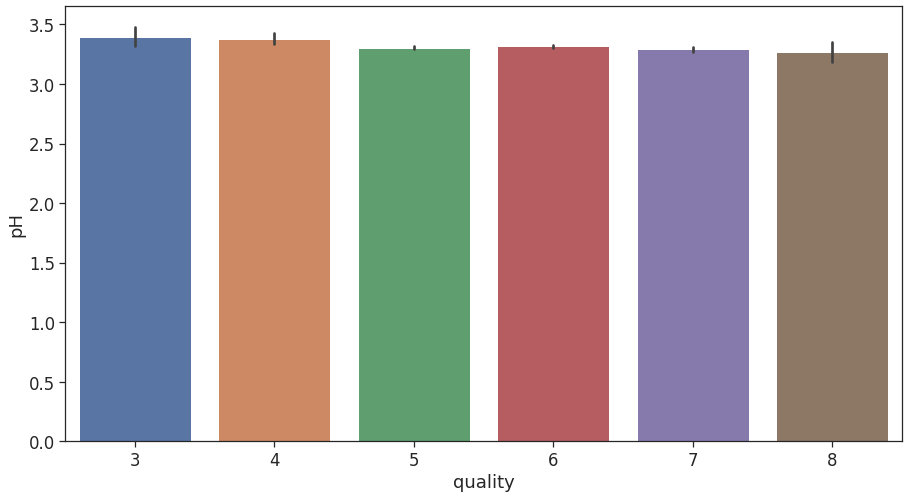

In [ ]:
fig = plt.figure(figsize = (15,8))
sns.barplot(x = 'quality', y = 'pH', data = data)

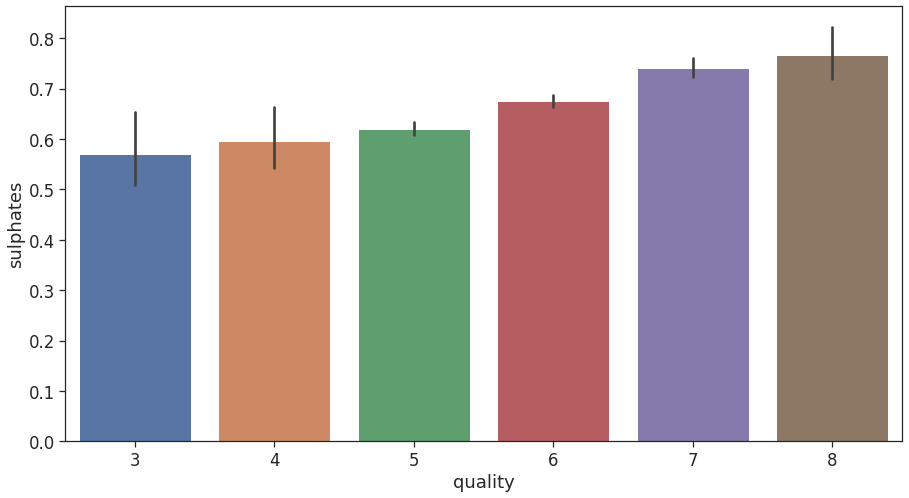

In [ ]:
fig = plt.figure(figsize = (15,8))
sns.barplot(x = 'quality', y = 'sulphates', data = data)

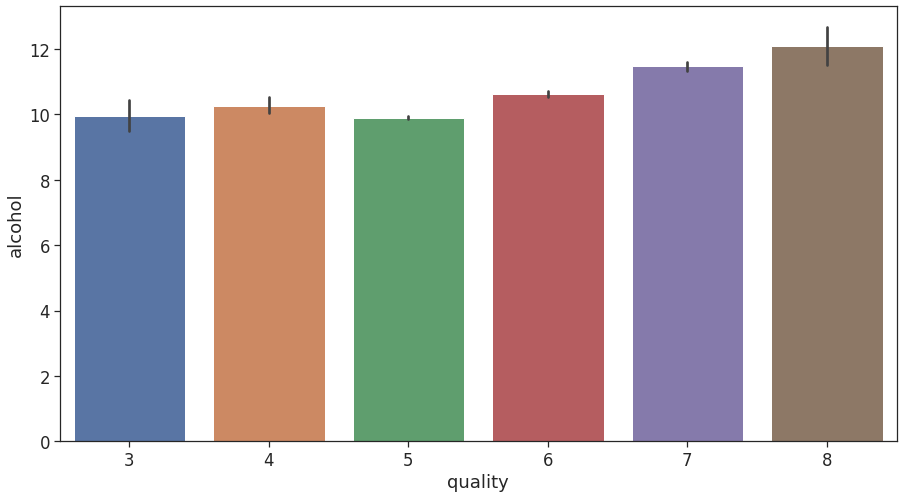

In [ ]:
fig = plt.figure(figsize = (15,8))
sns.barplot(x = 'quality', y = 'alcohol', data = data)

In [ ]:
data.drop(['density'], axis = 1, inplace = True)
display(data.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,5


In [ ]:
# Dividing Quality into two labels -- Bad & Good

bucket = (2, 6.1, 8)
bucket_label = ['bad', 'good']
data['quality'] = pd.cut(data['quality'], bins = bucket, labels = bucket_label)
display(data.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,3.16,0.58,9.8,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,bad


In [ ]:
data['quality'] = data['quality'].map({'bad':0,'good':1})
display(data.head(10))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,3.35,0.80,10.5,0


'Total number of different Wine samples: '

0    1382
1     217
Name: quality, dtype: int64

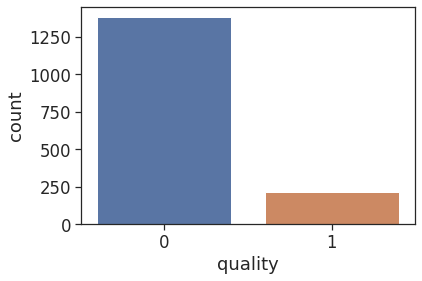

In [ ]:
# calculating count
display("Total number of different Wine samples: ",data['quality'].value_counts())

# representing counts using bar graph
sns.countplot(data['quality'])

In [ ]:
'Total number of different Wine samples: '

'Total number of different Wine samples: '